In [1]:
import spinmob, glob, sys, subprocess
import matplotlib.pylab as pylab
from IPython.core.display import Image 

# Add the Programs folder to be able to import everything and do demos...
sys.path.append('../Programs/')
import simple_plot, RvsT, error_test, GvsT

# Lab Outline

Tasks and things to do, to write, etc.

To add to it, use [Markdown](http://www.facebook.com/l.php?u=http%3A%2F%2Fmarkdowntutorial.com%2F&h=8AQGIPO_0). To write down equations, use dollar signs, and $\LaTeX$ syntax. You can use Python in code blocks.

## Goals

From the manual:
> - Measure the resistivity of germanium as a function of temperature and deduce conclusions regarding the conduction mechanism;
> - Measure the dependence of the Hall voltage across the sample on temperature;
> - Measure the magneto-resistance of the sample as a function of the magnetic field intensity;
> - **(optional)** Be creative! You may for instance study the dependence of the magneto-resistance effect on the orientation of the sample, study the heating rate of the sample, or do whatever else that may come to mind.

I propose that the optional part be spent on measuring the heating rate of the sample, as it brings together the temperature and magnetism aspect of the experiment. Still two weeks to think about, though. No worries.

## Theory behind the Hall effect (by Tuesday November 10, in the morning)

- See `References` for a nice [Youtube tutorial](https://www.facebook.com/l.php?u=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3DfZoFnKo-bwk&h=8AQGIPO_0) (thanks Nico!)

I suggest that **Nico** does this since he's already gone through a review of the theory like a pro.

### What we should get

- **All** of the equations we will use later in the lab, numbered
- Clear diagrams of the physics

### Equations from the manual

Each item in the list is for what I think should be one block for an equation in the final report. If it makes it.

<small>(To remove things, use double tildes like so: ~~removed~~. To add them, just append them in the place where they'd be most useful.)</small>

1. $ R = \frac{\rho L}{S} $ where $R$ is the *electrical resistance* for a material of length *L*, cross sectional area *S* and *resistivity* $\rho$. $\rho$ is dependant on temperature for a given material.
2. $\rho = \sigma^{-1}$ and $\vec{J}=\sigma\vec{E}$, where $\sigma$ is the conductivity, $\vec{J}$ is the vectorial current density and $\vec{E}$ is the electric field. For electrons (negative charge carriers) we have $\vec{J}=e^-n\vec{v}$ where $\vec{v}$ is the mean velocity of electrons and $n$ their density in the material.
3. $\rho(T) = a\cdot T^b$ and $R = \frac{\rho L}{S}$. Because we always use the same sample, $L/S$ is constant. Hence $$ R = a'\cdot T^b,\; a'=\frac{aL}{S}.$$ We don't need to measure the resistivity, and we can have a **way** smaller uncertainty! (repeated later, in the section on resistance against temperature)
4. In the intrinsic region, we have $R\propto T^{-3/2}$

## Apparatus (by Tuesday November 10, in the morning)

### What we should get

- A list and description of the equipment **David?**
- A schematic of the experimental setup **Émile**
- A diagram of how the information is processed (not just *computer*) **Émile**
- Precisions on which steps are delicate for specific things **Émile**

### Constant Current Power Supply

* Labeled *Current source* on the diagram
* Needs to be on when we take the measurements
* Both red LEDs should be on. If the top one blinks, it means we have a faulty conection at the back
* It provides the current that flows through the germanium sample. It should be set to 1mA.
* The `OUTPUT` switch should be set to `NORM`**???**

### Variable DC Power Supply

* Provides power to the heater
* Should be used to bring the sample from around $290\mathrm{K}$ to $400\mathrm{K}$
* Make sure it is off when we leave
* The heater heats up the copper casing of the sample. For the sample to be at the same temperature, we need to heat everything slowly. So set the heater to between $5\mathrm{V}$ and $10\mathrm{V}$.

### Thermocouple System (with cold-junction compensator)

* Measures the temperature of the copper casing of the sample. Used as a proxy for the sample temperature.
* The cold-junction compensator is battery powered; make sure it is on when taking measurements.

### Magnet

### Magnetic Field Measurements with the Hall probe

### Keithley Digital Multimeter

* Takes in all the data
* Has multiple channels
* To see a specific channel manually, we can stop the `hall` program, and press the `LOCAL` and then the `SCANNER` button, before pressing the channel number you need.

### Software

See Appendix C from the manual, and the page on [Hall programs](http://www.ugrad.physics.mcgill.ca/wiki/index.php/Software:Hall_Effect) on the wiki. There's also `Manual/hall-effect-guide.pdf` by Mark that explains a lot about the software.

#### `hall` program for data acquisition

`hall` produces nine columns of data. The first 7 columns are the data from the different probes on the sample (diagram to come). The eightth column is the thermocouple voltage, and the last column is a time stamp. Using this data, we can get the potential differences between any two of the probes, as a function of time, or temperature, and get the temperature as a function of time.

#### `hall_process` program for preparing data for plotting

`hall_process` takes the data in the files produced by `hall`, and splits it into more manageable files. It's syntax is as follows:

    $ hall_process [-b bin width] input_file

`bin width` is the temperature range we want to use for each bin. The default is $1\mathrm{K}$. `input_file` is the file `hall_process` reads from. The program outputs 8 files, numbered 1 through 8, according to the voltage column they contain. They have four columns. The first one is the center of the temperature bin, the second is the average potential for the probe within the bin temperatures, the third is the statistical uncertainty from the averaging, and the fourth column is the number of measurements taken into account.

**Jack's advice**: Don't use that statistical uncertainty. Find your own. *What we can do*: take a series of measurements at room temperature to figure out the uncertainty on temperature/voltage. Then reduce the bin size to the precision of the temperature measurements ($1\mathrm{K}$), to have bins of a for single temperature measurements. Do our uncertainty analysis on that.

#### Data manipulation programs

- `hall_add`
- `hall_subtract`
- `hall_product`
- `hall_quotient`

#### Analysis software that we use

These should all be in the `Programs/` folder of the Git repository. We'll use `spinmob` as the main module for the analysis. `gnuplot` will also be used to produce plots right on the lab computer, since it doesn't have `matplotlib` installed.

### Block diagram for the magnets and stuff

See Fig. 3 from the manual. I'll reproduce it in OmniGraffle or with $\LaTeX$, and include the electronics.

I'll also produce a software diagram, so that we can easily show how we did the analysis. This can only be done at the end, though.

We'll also need a diagram like Fig. 4 from the manual for the sample holder.

![Block diagram](../Graphs/Apparatus.png)

![Detailed block diagram](../Graphs/Full apparatus.png)

![Sample holder](../Graphs/Sample.png)

### Delicate steps and things

- Do *not* exceed a *sample* temperature of $383\,\mathrm{K}$ (110°C)
- Be careful with the sample when it is very cold or close to $383\,\mathrm{K}$
- The sample and its wiring are *very* fragile
- Turn off the power sources when we leave, unless we're takign data
- Make sure cooling water is running when using the magnet
- Make sure the cold-junction compensator is switched **on** when used and **off** when unused

## ~~Measurement of the sample's relevant dimensions (by the end of Tuesday November 9's lab session)~~

### ~~What we should get~~

- A table of the sample dimensions
- Labels of the dimensions on the diagram of the sample holder

### ~~Actual measurement~~

Apparently, we will **not** be measuring the sample ourselves, instead using pictures taken by Dominic or Mark. The sample is too fragile to be manipulated by our impure hands ;P We also **don't** need the dimensions for most of the experiment. To paraphrase Dominic: the dimensions of the sample are only useful to get the resistivity, carrier density or charge. We rarely need those, so whenever we can, we should use the **resistance** instead of the resistivity, to reduce our uncertainties in the other sections of the experiment. I'll check, but this may mean that we can **completely scrap this part of the experiment**.

### Info on the Ge sample by the manufacturer

Source: “UNILAB Thermionic and Solid State Devices”, in `Manual/Appendices/App_E_Hall_Crystal_Properties.pdf`

In [2]:
l, w, d = 2e-2, 1e-2, 1e-3 # m
sample_size_uncertainty = 0.1e-3 # m

nominal_resistivity, nre_uncertainty = 3.8e2, 0.1e2 # Ohms/m (at room temp?)
nominal_hall_coefficient, nhc_uncertainty = 1.47e-4, 0.01e-4 # m³/Coulombs (for both P and N)
nominal_carrier_concentration, ncc_uncertainty = 5e22, 1e22 # atoms/m³ (for both P and N)

## ~~Resistivity~~ _Resistance_ as a function of temperature (start on Tuesday November 9)

### Methods

Turn on the current source, thermocouple, and multimeter. Cool down the sample with liquid nitrogen until the temperature stabilizes, around $140\mathrm{K}$. ~~Make sure the nitrogen can evaporate from the thermos, otherwise the sample won't warm back up to room temperature in any reasonable time. You can do this by taking a paper towel to brush off the ice forming around the thermos.~~ _Turns out that wiping the ice causes weird things to happen to the temperature. Let's not wipe it so we get smooth temperature curves._ Use `hall` to check on the temperature. Once the temperature is stable, restart `hall` to get a data file with only the data we need. When the temperature reaches ~~$250\mathrm{K}$ (not)~~ $290\mathrm{K}$, turn on the heater ~~with a low potential to help bring the sample up to $400\mathrm{K}$. Raise the heater voltage if the temperature stabilizes again.~~ _Everytime we change the heater, we change how the temperature increases. Let's set it to the max right away and wait._ Be careful to not let the sample heat up over $400\mathrm{K}$, because the soldered connections could melt. Turn off the current source, thermocouple, multimeter and heater.

### What we should get out

- A graph
- A fit, with uncertainties and chi-square 

### Not having to use the resistivity

From the manual: $\rho(T) = a\cdot T^b$ and $R = \frac{\rho L}{S}$. Because we always use the same sample, $L/S$ is constant. Hence $$ R = a'\cdot T^b,\; a'=\frac{aL}{S}.$$ We don't need to measure the resistivity, and we can have a **way** smaller uncertainty!

### Fitting the data

We should get a graph with two distinct parts; a power part, and an exponential part. We'll fit the first part using $R = a'\cdot T^b$, and verify that $b\approx3/2$, and the second part using $R=a'\exp\frac{b}{T}$ to find the band gap energy $E_g$ with Eq. 6 from the manual, $\sigma\propto\exp\frac{E_g}{2k_BT}.$ Again, because $\sigma=1/\rho$, we can use $R$ as a proxy and reduce our uncertainty since then $R^{-1}\propto\sigma$ and this does not influence $E_g$ in the parameters. 

~~We need to use $V_5$ from the data we take as the voltage drop across the crystal (confirm with Mark).~~ The potential difference across the length of the germanium sample is read both by $V_5$ and $V_6$. Both should give out the *same reading*, or very close to one another ~~**(What if they don't?)**~~. We can use a single one of them in the analysis, or both and compare the results.

$V_5$ and $V_6$ may be different because of the sample lengths, top and bottom.

The data is in `Data/Resistance vs temperature`, and info on it is in `Data/Resistance vs temperature/Readme.md`.

**Discovered here**: running the current source in `REVRS` doesn't change the gaps between $V_5$ and $V_6$, but changes the sign. To correct for this in this first data set, we'll just have to invert the signs of all the potentials. In future data collection, we'll have the `OUTPUT` of the current source set to `NORM`.

> **Jack's advice**: Don't use that statistical uncertainty. Find your own. *What we can do*: take a series of measurements at room temperature to figure out the uncertainty on temperature/voltage. ~~Then reduce the bin size to the precision of the temperature measurements ($1\mathrm{K}$), to have bins of a for single temperature measurements. Do our uncertainty analysis on that.~~

~~The files where Émile tests this are `Data/Error test/` and `Programs/error_test.py`.~~

~~$ hall_process -b 0.0001 error_test.data # The tiny bin width is to make sure we get single measurements~~
    
**This first idea DOES NOT WORK** because of how `hall_process` outputs stuff.

In the folder `Data/Constant Temperature` we have the data used to determine the uncertainty on the temperature measurements.

    $ hall room.data

And then with the heater on, once equilibrium is reached

    $ hall hot.data

~~We could write a script that "unpacks" the data from the output of `hall_process`, essentially unbinning it.~~ Or we could compound the statistical uncertainty introduced by the bins to that of the temperature. We find that uncertainty from the variation on $V_5$ and $V_6$ at the constant temperatures, and divide it by $\sqrt{n}$ for each bin to get the new uncertainties of each bin.


loaded ../Data/Constant temperature/cold 

cold 7.38e-05 [4e-05, 2e-05, 2e-04, 2e-05, 7e-05, 1e-04]

loaded ../Data/Constant temperature/cold.8 



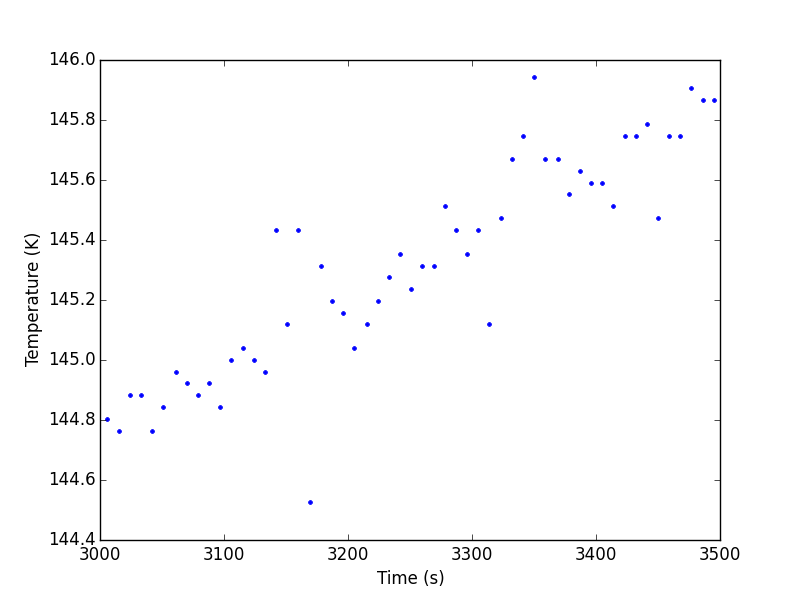

In [52]:
reload(error_test)
reload(simple_plot)

data_file = '../Data/Constant temperature/cold'
cold_err, cold_errs = error_test.make_error(data_file, xin=(3000, 3500))
print 'cold {:1.2e} [{:1.0e}, {:1.0e}, {:1.0e}, {:1.0e}, {:1.0e}, {:1.0e}]'.format(cold_err, *cold_errs)
simple_plot.simple_plot(data_file+'.8', xlabel='Time (s)', ylabel='Temperature (K)', xmin=3000, xmax=3500)
Image('../Graphs/Simple plots/cold.8.png')


loaded ../Data/Constant temperature/room.data 

room 2.01e-05 [2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05]

loaded ../Data/Constant temperature/room.data.8 



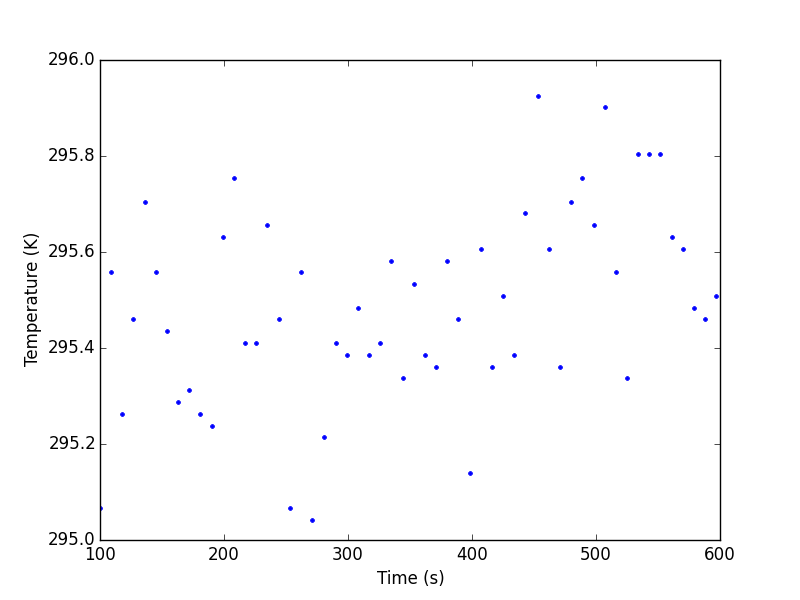

In [53]:
reload(error_test)
reload(simple_plot)

data_file = '../Data/Constant temperature/room.data'
room_err, room_errs = error_test.make_error(data_file, xin=(100, 600))
print 'room {:1.2e} [{:1.0e}, {:1.0e}, {:1.0e}, {:1.0e}, {:1.0e}, {:1.0e}]'.format(room_err, *room_errs)
simple_plot.simple_plot(data_file+'.8', xlabel='Time (s)', ylabel='Temperature (K)', xmin=100, xmax=600)
Image('../Graphs/Simple plots/room.data.8.png')


loaded ../Data/Constant temperature/hot.data 

hot 1.79e-05 [1e-05, 2e-05, 2e-05, 2e-05, 2e-05, 1e-05]

loaded ../Data/Constant temperature/hot.data.8 



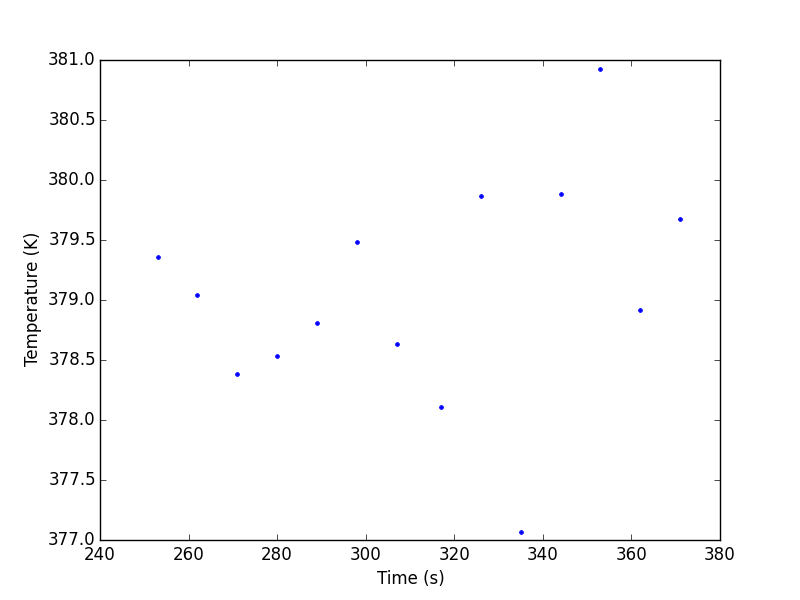

In [54]:
data_file = '../Data/Constant temperature/hot.data'
hot_err, hot_errs = error_test.make_error(data_file, xin=(250, 400))
print 'hot {:1.2e} [{:1.0e}, {:1.0e}, {:1.0e}, {:1.0e}, {:1.0e}, {:1.0e}]'.format(hot_err, *hot_errs)
simple_plot.simple_plot(data_file+'.8', xlabel='Time (s)', ylabel='Temperature (K)', xmin=250, xmax=400)
Image('../Graphs/Simple plots/hot.data.8.png')


loaded ../Data/Resistance against temperature/Dec1/hot 

hot 1.78e-04 [9e-05, 2e-05, 5e-04, 2e-05, 2e-04, 3e-04]

loaded ../Data/Resistance against temperature/Dec1/hot.8 



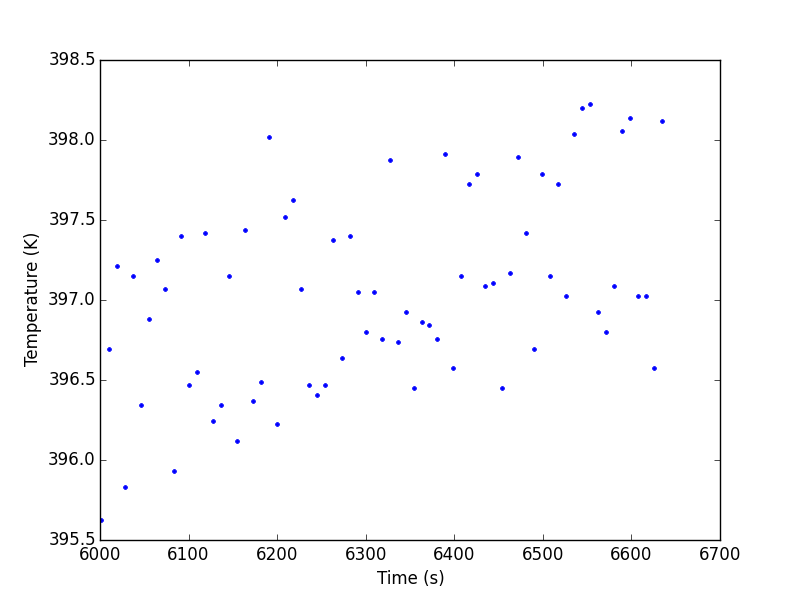

In [56]:
data_file = '../Data/Resistance against temperature/Dec1/hot'
hot_err, hot_errs = error_test.make_error(data_file, xin=(6000, 7000))
print 'hot {:1.2e} [{:1.0e}, {:1.0e}, {:1.0e}, {:1.0e}, {:1.0e}, {:1.0e}]'.format(hot_err, *hot_errs)
simple_plot.simple_plot(data_file+'.8', xlabel='Time (s)', ylabel='Temperature (K)', xmin=6000, xmax=7000)
Image('../Graphs/Simple plots/hot.8.png')


loaded ../Data/Resistance against temperature/Nov12/slow_warming.5 


loaded ../Data/Resistance against temperature/Nov12/slow_warming.5 


loaded ../Data/Resistance against temperature/Nov24/data.5 


loaded ../Data/Resistance against temperature/Nov24/data.6 


loaded ../Data/Resistance against temperature/Dec1/hot.5 


loaded ../Data/Resistance against temperature/Dec1/hot.6 



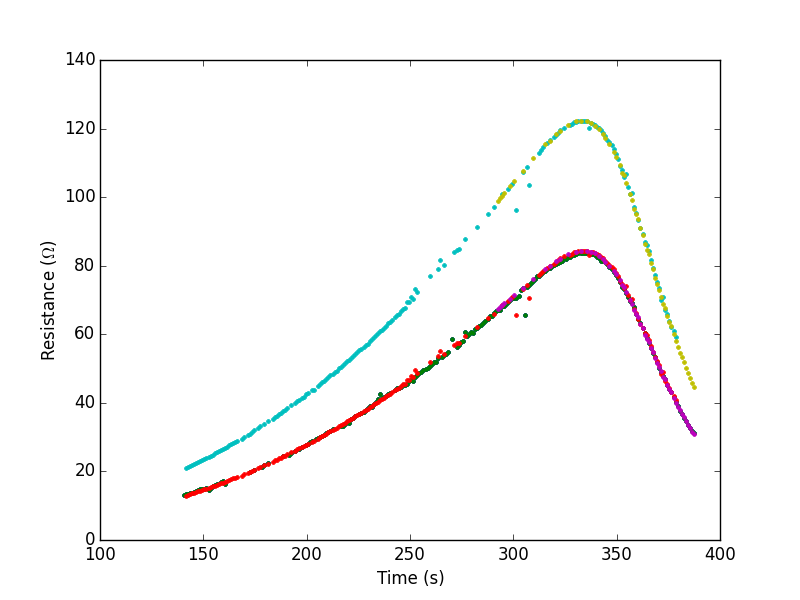

In [15]:
reload(simple_plot)

data_files = ['../Data/Resistance against temperature/Nov12/slow_warming.5',
              '../Data/Resistance against temperature/Nov12/slow_warming.5',
              '../Data/Resistance against temperature/Nov24/data.5',
              '../Data/Resistance against temperature/Nov24/data.6',
              '../Data/Resistance against temperature/Dec1/hot.5',
              '../Data/Resistance against temperature/Dec1/hot.6']
simple_plot.simple_plot(data_files, xlabel='Time (s)', ylabel='Resistance ($\\Omega$)', fct=lambda x: x/0.001)
Image('../Graphs/Simple plots/slow_warming.5.png')


loaded ../Data/Resistance against temperature/Nov24/data.6 


loaded ../Data/Resistance against temperature/Dec1/hot.6 

# Power fit

FIT RESULTS (reduced chi squared = [0.84471860045465996])
  a          = 0.566099 +/- 0.00457957
  x0         = 128.063 +/- 0.858891


# Exponential fit

FIT RESULTS (reduced chi squared = [1.0462496908289987])
  a          = 3.82743E+06 +/- 454346
  b          = -0.0293233 +/- 0.000303402




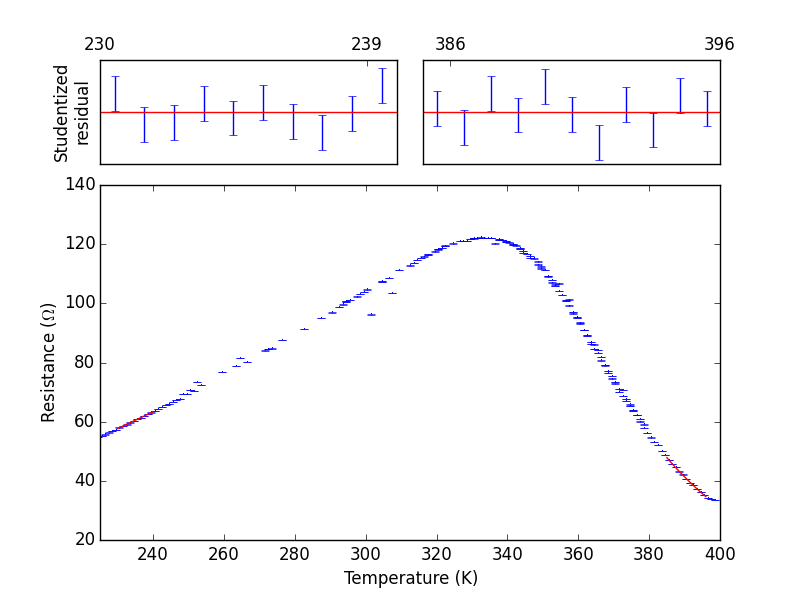

In [73]:
reload(RvsT)

# The data we want is in files 5 and 6
data_files = [#'../Data/Resistance against temperature/Nov12/slow_warming.6',
              '../Data/Resistance against temperature/Nov24/data.6',
              '../Data/Resistance against temperature/Dec1/hot.6']
a, b, c, d = 230, 240, 385, 396
# Guess parameters for power fit: 
pguess = (1, 200)
# Guess parameters for exp fit:
eguess = (1e4, 1) # The second parameter is actually guessed at again in RvsT
fits = RvsT.main(data_files, a, b, c, d, pguess, eguess, cold_errs[5], 2.5*hot_errs[5])
RvsT.print_results(fits)
Image('../Graphs/Fits.png')


loaded ../Data/Resistance against temperature/Nov24/data.5 


loaded ../Data/Resistance against temperature/Dec1/hot.5 

# Power fit

FIT RESULTS (reduced chi squared = [0.8209752449585741])
  a          = 0.395998 +/- 0.00335298
  x0         = 132.588 +/- 0.860662


# Exponential fit

FIT RESULTS (reduced chi squared = [1.0870363013164219])
  a          = 3.07422E+06 +/- 371536
  b          = -0.0297167 +/- 0.000308897




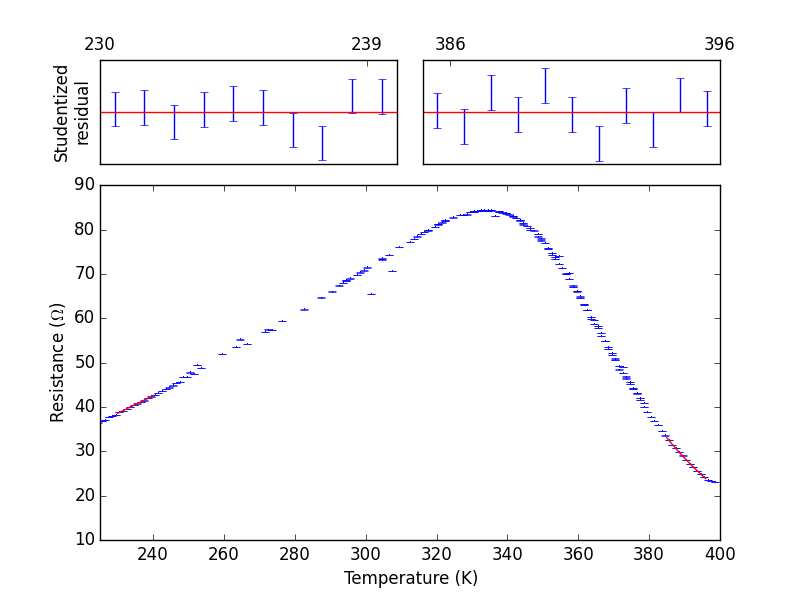

In [74]:
reload(RvsT)

# The data we want is in files 5 and 6
data_files = [#'../Data/Resistance against temperature/Nov12/slow_warming.6',
              '../Data/Resistance against temperature/Nov24/data.5',
              '../Data/Resistance against temperature/Dec1/hot.5']
a, b, c, d = 230, 240, 385, 396
# Guess parameters for power fit: 
pguess = (1, 200)
# Guess parameters for exp fit:
eguess = (1e4, 1) # The second parameter is actually guessed at again in RvsT
fits = RvsT.main(data_files, a, b, c, d, pguess, eguess, cold_errs[4], 2.5*hot_errs[4])
RvsT.print_results(fits)
Image('../Graphs/Fits.png')


loaded ../Data/Resistance against temperature/Nov24/data.5 


loaded ../Data/Resistance against temperature/Dec1/hot.5 

# Power fit

FIT RESULTS (reduced chi squared = [0.8209752449585741])
  a          = 0.395998 +/- 0.00335298
  x0         = 132.588 +/- 0.860662


# Exponential fit

FIT RESULTS (reduced chi squared = [1.0870363013164219])
  a          = 3.07422E+06 +/- 371536
  b          = -0.0297167 +/- 0.000308897




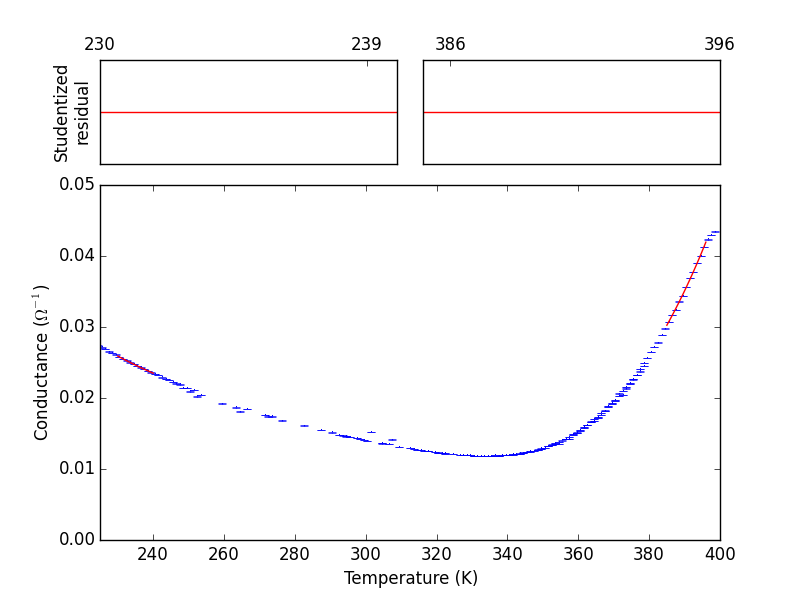

In [83]:
reload(GvsT)
reload(RvsT)

# The data we want is in files 5 and 6
data_files = [#'../Data/Resistance against temperature/Nov12/slow_warming.6',
              '../Data/Resistance against temperature/Nov24/data.5',
              '../Data/Resistance against temperature/Dec1/hot.5']
a, b, c, d = 230, 240, 385, 396
# Guess parameters for power fit: 
pguess = (1, 200)
# Guess parameters for exp fit:
eguess = (1e4, 1) # The second parameter is actually guessed at again in RvsT
fits = GvsT.main(data_files, a, b, c, d, pguess, eguess, cold_errs[4], 2.5*hot_errs[4])
RvsT.print_results(fits)
Image('../Graphs/Fits.png')

## Hall coefficient as a function of temperature (start on ~~Thursday November 11, use for interim report~~ Tuesday November 16)

### Methods

#### Calibrating the magnet

We want to apply a magnetic field of $0.5\,\mathrm{T}$ to our sample. We can compute the magnetic field from the potential measured across the Hall probe (haha, recursion) using the given calibration equation.

### Hall coefficient gainst temperature

Turn on the magnets with the determined input current. We place the sample in between the magnets and find the orientation in which the voltage drop $V_5$ (or $V_6$) is the highest. Cool the sample with liquid nitrogen, and proceed as when measuring resistance against temperature. Repeat with the sample turned by 180°.

### What is the angle of maximal voltage drop?

Place the sample at different angles, measured using a homemade angle-o-tron taped to the sample holder. Measure the voltage drop at each of those angles with the voltmeter in manual mod, to see only the $V_5$ and $V_6$ channels. Fit a smooth periodic function to the obtained curve, and find its maximum to get the angle of maximal voltage drop. The raw data is in `Data/Voltage drop vs. angle`.

### Which $V_{hall}$ to look for

Our calibration fit is (for EQ3403) $\gamma = 9.62\,\mathrm{mT}$ and $\delta = 1.8949\,\mathrm{mT/mV}$ for $B = \delta V + \gamma$.

In [32]:
delta, gamma = 1.8949, 9.62 # mT/mV, mT
field = lambda V: delta * V + gamma

alpha, beta = -5, 0.5276
potential = lambda B: alpha + beta * B

expected_potential = potential(500)
print expected_potential, 'mV'

258.8 mV


In [33]:
# Observed on the two different orientations of the probe
observed_potential = pylab.array([256, 263])
observed_field = field(observed_potential)
print observed_potential, 'mV', '->', observed_field, 'mT'

[256 263] mV -> [ 494.7144  507.9787] mT


In [34]:
reload(simple_plot)

# Test run, without the appropriate angle
data_file = '../Data/Hall coefficient/position_test.data'
simple_plot.simple_plot(data_file+'.8', xlabel='Time (s)', ylabel='Temperature (K)')
simple_plot.simple_plot(data_file+'.5', xlabel='Temperature (K)', ylabel='Potential (V)')
simple_plot.simple_plot(data_file+'.6', xlabel='Temperature (K)', ylabel='Potential (V)')
fig1 = Image('../Graphs/Simple plots/position_test.data.8.png')
fig2 = Image('../Graphs/Simple plots/position_test.data.5.png')
fig3 = Image('../Graphs/Simple plots/position_test.data.6.png')


loaded ../Data/Hall coefficient/position_test.data.8 


loaded ../Data/Hall coefficient/position_test.data.5 


loaded ../Data/Hall coefficient/position_test.data.6 




loaded ../Data/Hall coefficient/run_360deg 



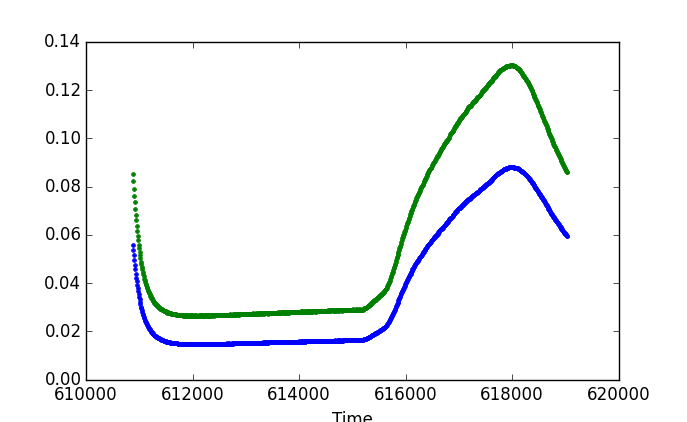

In [38]:
# Looking at time evo for Hall measurements (1)

data_file = '../Data/Hall coefficient/run_360deg'

databox = spinmob.data.load(data_file)
pylab.clf()
xs = databox.c('c8') - 1447775014 # Time in seconds
for i in range(4, 6):
        vals = databox.c('c{:d}'.format(i))
        #ts, ys = [x for x in xs if x < 10000], [y for x, y in zip(xs, vals) if x < 10000]
        #print pylab.std(ys)
        pylab.plot(xs, vals, '.')
pylab.xlabel('Time')
pylab.savefig('../Graphs/error_test.png')
Image('../Graphs/error_test.png')

## Magneto-resistance against magnetic field intensity (start Thursday November 21) [David]

### What we should get out

- A graph
- A fit with uncertainties and chi-square

## Lab report checklist

- ~~Used the Lyx or $\LaTeX$ template~~
- The page count is within the allowed limits
- Every measured number has a justified error bar
- All parts of figures and equations are captioned
- All figures and equations are introduced in the text
- All plotted points show statistical error on each point
- All fits show the statistical error on the fit
- ~~Systematic errors are explained~~
- Error bars in plots are explained in the caption and text
- The abstract includes a list of major results, and comparison with expectations
- Fit results include the $\chi^2$ and degrees of freedom in the caption
- ~~Fits include a plot of studentized residuals~~